In [1]:
import sympy as sp
import numpy as np
from sympy.plotting import plot as plotSP
from scipy.integrate import odeint
from matplotlib.pyplot import plot

Let's consider mathetical pendulum with kinetic energy $T$, potential energy $V$, and Lagrangian $L$

$ T = \frac{ml^2\dot{\phi}^2}{2} $, $V = mgl(1-cos(\phi))$

$ L = T - V = \frac{\dot{\phi}^2}{2} - 1 + cos(\phi)$

Lagrangian equation ($\frac{d}{dt} \frac{\partial L}{\partial \dot{\phi}} - \frac{\partial L}{\partial \phi} = 0$) for the system when $m=g=l=1$ is as follows

$ \ddot{\phi} + sin(\phi) = 0$

In [2]:
# Symbolis calculations
m, g, l = sp.symbols('m g l', real = True)
m = 1
g = 1
l = 1
t = sp.symbols('t')
q = sp.Function('q')(t)
qDot = sp.Function('qDot')(t)

T = 1 / 2 * m * l**2 * qDot ** 2     # kinetic energy
V = m * g * l * (1 - sp.cos(q))      # potential energy
L = T - V                            # Lagrangian function

eqn = sp.diff(sp.diff(L, qDot), t) - sp.diff(L, q) 
print('Lagrangian function L = ', L)
print('Lagrangian equation', eqn)

Lagrangian function L =  0.5*qDot(t)**2 + cos(q(t)) - 1
Lagrangian equation sin(q(t)) + 1.0*Derivative(qDot(t), t)


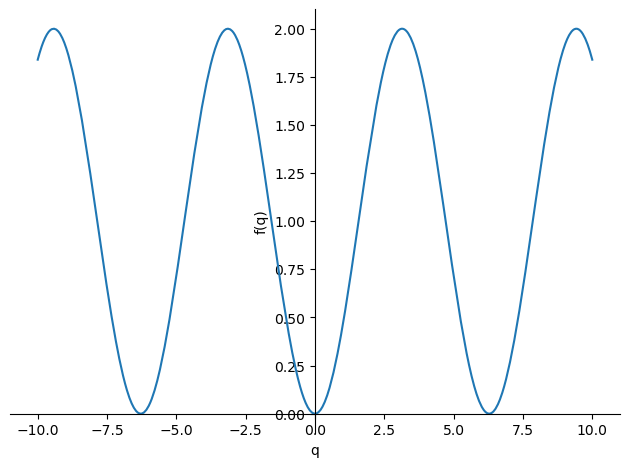

In [3]:
# Let's plot the potential function
q = sp.symbols('q')
V = sp.Function('V')

V = 1 - sp.cos(q)
plotSP(V)

$ E = T + V = \frac{\dot{\phi}}{2} + (1 - cos(\phi)) = const$

Case 1. For energy level $0 \geq E < 2$ (for the given $m,g,l$) phase trajectory crosses $q$-axis and is a closed phase trajectory 
Case 2. For $ E > 2$ it never crosses $q$-axis

Taking into account that the energy $E$ is conserved let's find the initial conditions for two types of phase trajectories if $\phi_0 = 0$

$ E = \frac{\dot{\phi}^2}{2}$

Thus for case 1 $\dot{\phi} < 2$ and for case 2 $\dot{\phi} > 2$.

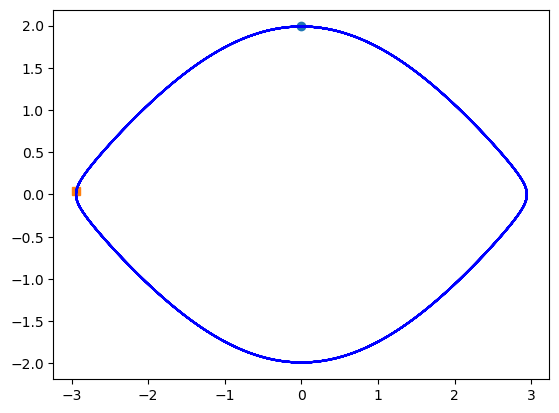

In [5]:
# Case 1
def rhs(X, t):
    x1, x2 = X
    return [x2, - sp.sin(x1)]

tspan = np.linspace(0, 100, 100000)
X0 = [0, 2 - 0.01]
Xs = odeint(rhs, X0, tspan)

plot([Xs[0,0]], [Xs[0,1]], 'o') # start
plot([Xs[-1,0]], [Xs[-1,1]], 's') # end
plot(Xs[:,0], Xs[:,1], 'b-') # path

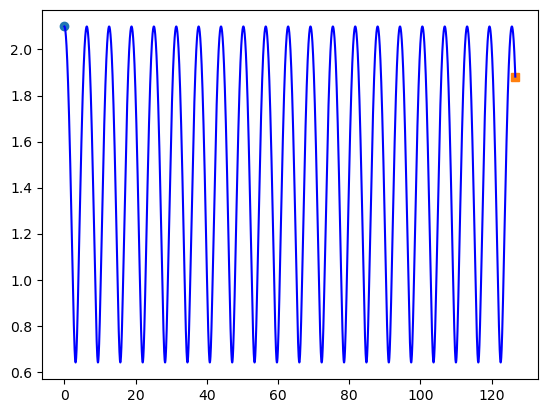

In [6]:
# Case 2

def rhs(X, t):
    x1, x2 = X
    return [x2, - sp.sin(x1)]

tspan = np.linspace(0, 100, 100000)
X0 = [0, 2 + 0.1]
Xs = odeint(rhs, X0, tspan)

plot([Xs[0,0]], [Xs[0,1]], 'o') # start
plot([Xs[-1,0]], [Xs[-1,1]], 's') # end
plot(Xs[:,0], Xs[:,1], 'b-') # path


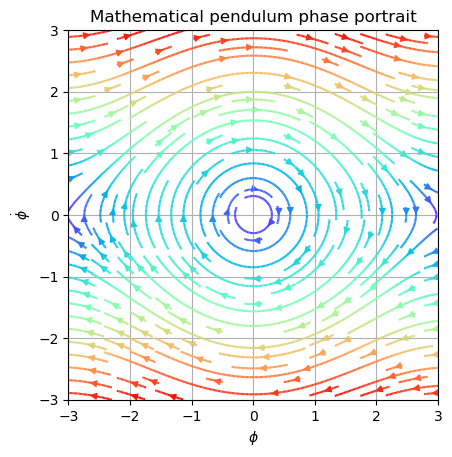

In [7]:
# Phase portrait for the considered system

from phaseportrait import PhasePortrait2D
def dFOscillator(x, y):
    return y, - np.sin(x)

example2 = PhasePortrait2D(dFOscillator, [-3, 3], Title=r'Mathematical pendulum phase portrait', xlabel=r'$\phi$', ylabel=r'$\dot{\phi}$')
fig, ax = example2.plot()

In [8]:
# Some usefull stuff

q1, q2 = sp.symbols('q1, q2')
V = q1**2 / 2 + q2**2 / 2
F = sp.Matrix([-q1, -q2])
dqVec = sp.Matrix([q1, q2])

Calt = -F.jacobian(dqVec)

C = sp.hessian(V, (q1, q2))


print(C, Calt)

detC = sp.det(C)
C.eigenvals()
C.eigenvects()

Matrix([[1, 0], [0, 1]]) Matrix([[1, 0], [0, 1]])


[(1,
  2,
  [Matrix([
   [1],
   [0]]),
   Matrix([
   [0],
   [1]])])]